Modelo que pretende predecir ventas en función de la inversión en anuncios en diferentes categorías. Dicho escenario permite graficar en 3d el modelo construido en comparativa con el conjunto de entrenamiento y el conjunto de testeo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaushik-Varma/linear_regression_model_python/main/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Exploración inicial de los datos

In [4]:
data.info()
# data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


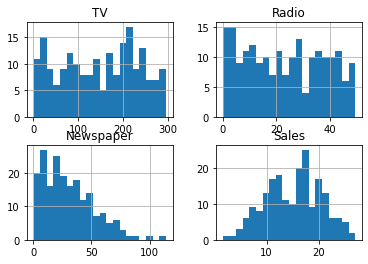

In [6]:
data.hist(bins=20)
plt.show()

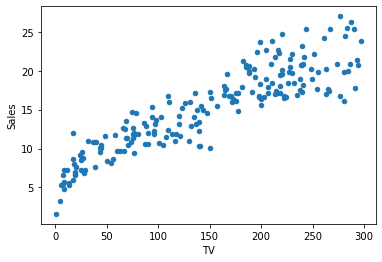

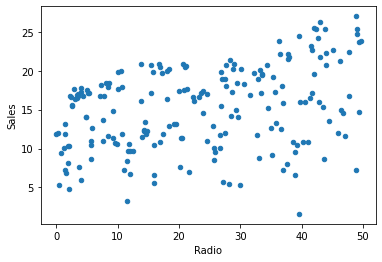

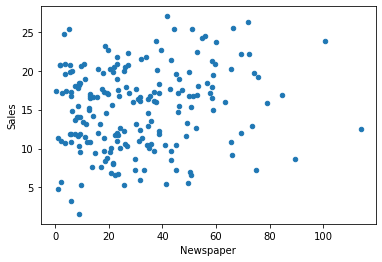

In [11]:
strategies = ['TV', "Radio", "Newspaper"]
for strategy in strategies:    
    data.plot(kind='scatter', x=strategy, y='Sales')
    ax = plt.gca()
    ax.set_xlabel(strategy)
    ax.set_ylabel("Sales")
plt.show()

Gráfico usando más de dos variables

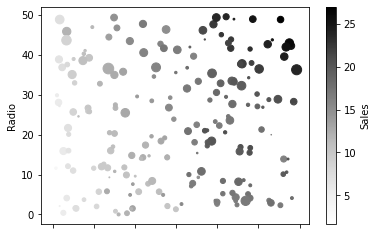

In [14]:
data.plot(kind='scatter', x='TV', y='Radio', s='Newspaper', c='Sales')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(160, 4)
(40, 4)


Análisis de correlaciones

In [15]:
corr_matrix = data.corr()

In [17]:
corr_matrix['Sales'].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [20]:
advertisements_train = train_set[['TV', 'Radio', 'Newspaper']]
advertisements_test = test_set[['TV', 'Radio', 'Newspaper']]
sales_train = train_set['Sales']
sales_test = test_set['Sales']

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()

lin_reg.fit(advertisements_train, sales_train)


LinearRegression()

In [23]:
sales_pred = lin_reg.predict(advertisements_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [26]:
from math import remainder


mse_lin_reg = mean_squared_error(sales_test, sales_pred)
rmse_lin_reg = np.sqrt(mse_lin_reg)
print(rmse_lin_reg)

1.705214622934923


Se pretende una descripción geométrica en 3d luego de las predicciones. La idea es considerar únicamente las variables más correlacionadas, es decir 'TV' y 'Radio' en los ejes $x$ y $y$ para luego tomar en el eje $z$ la variable 'Sales'  

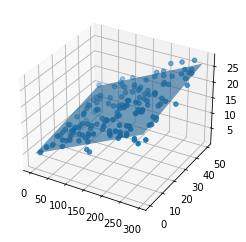

In [38]:
x_min, x_max = advertisements_train['TV'].min(), advertisements_train['TV'].max()
y_min, y_max = advertisements_train['Radio'].min(), advertisements_train['Radio'].max()
newsp_min, newsp_max = advertisements_train['Newspaper'].min(), advertisements_train['Newspaper'].max()
newsp_mean = (newsp_min + newsp_max) / 2
X, Y = np.meshgrid(np.array([x_min, x_max]), np.array([y_min, y_max]))
instancias = np.array([[x_min, y_min, newsp_min],
                        [x_min, y_max, newsp_mean],
                        [x_max, y_min, newsp_mean], 
                        [x_max, y_max, newsp_max]])
Z = lin_reg.predict(instancias).reshape(2,2).T

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(advertisements_train['TV'], advertisements_train['Radio'], sales_train)
ax.plot_surface(X, Y, Z, alpha=0.6)
plt.show() # gráfico que muestra el modelo constuido con conjunto de entrenamiento

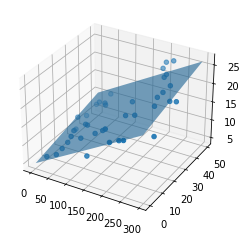

In [39]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(advertisements_test['TV'], advertisements_test['Radio'], sales_test)
ax.plot_surface(X, Y, Z, alpha=0.6)
plt.show() # frafico para etapa de verificación